## **Problem Statement:**

- This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.
- The company wants to know:
  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands


In [151]:
import numpy as np
import pandas as pd
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [152]:
df = pd.read_csv("/dataset/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [153]:
df.shape

(730, 16)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [155]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [156]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [157]:
# Dropping instant, dteday, casual, registered.

df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
df.shape

(730, 12)

In [158]:
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [159]:
df[['season']] = df[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
df[['mnth']] = df[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                                                7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}))
df[['weekday']] = df[['weekday']].apply(lambda x: x.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday',
                                       4:'Thursday', 5:'Friday', 6:'Saturday'}))
df[['weathersit']] = df[['weathersit']].apply(lambda x: x.map({1: 'clear', 2:'moderate', 3:'high', 4:'veryhigh'}))

In [160]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [161]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


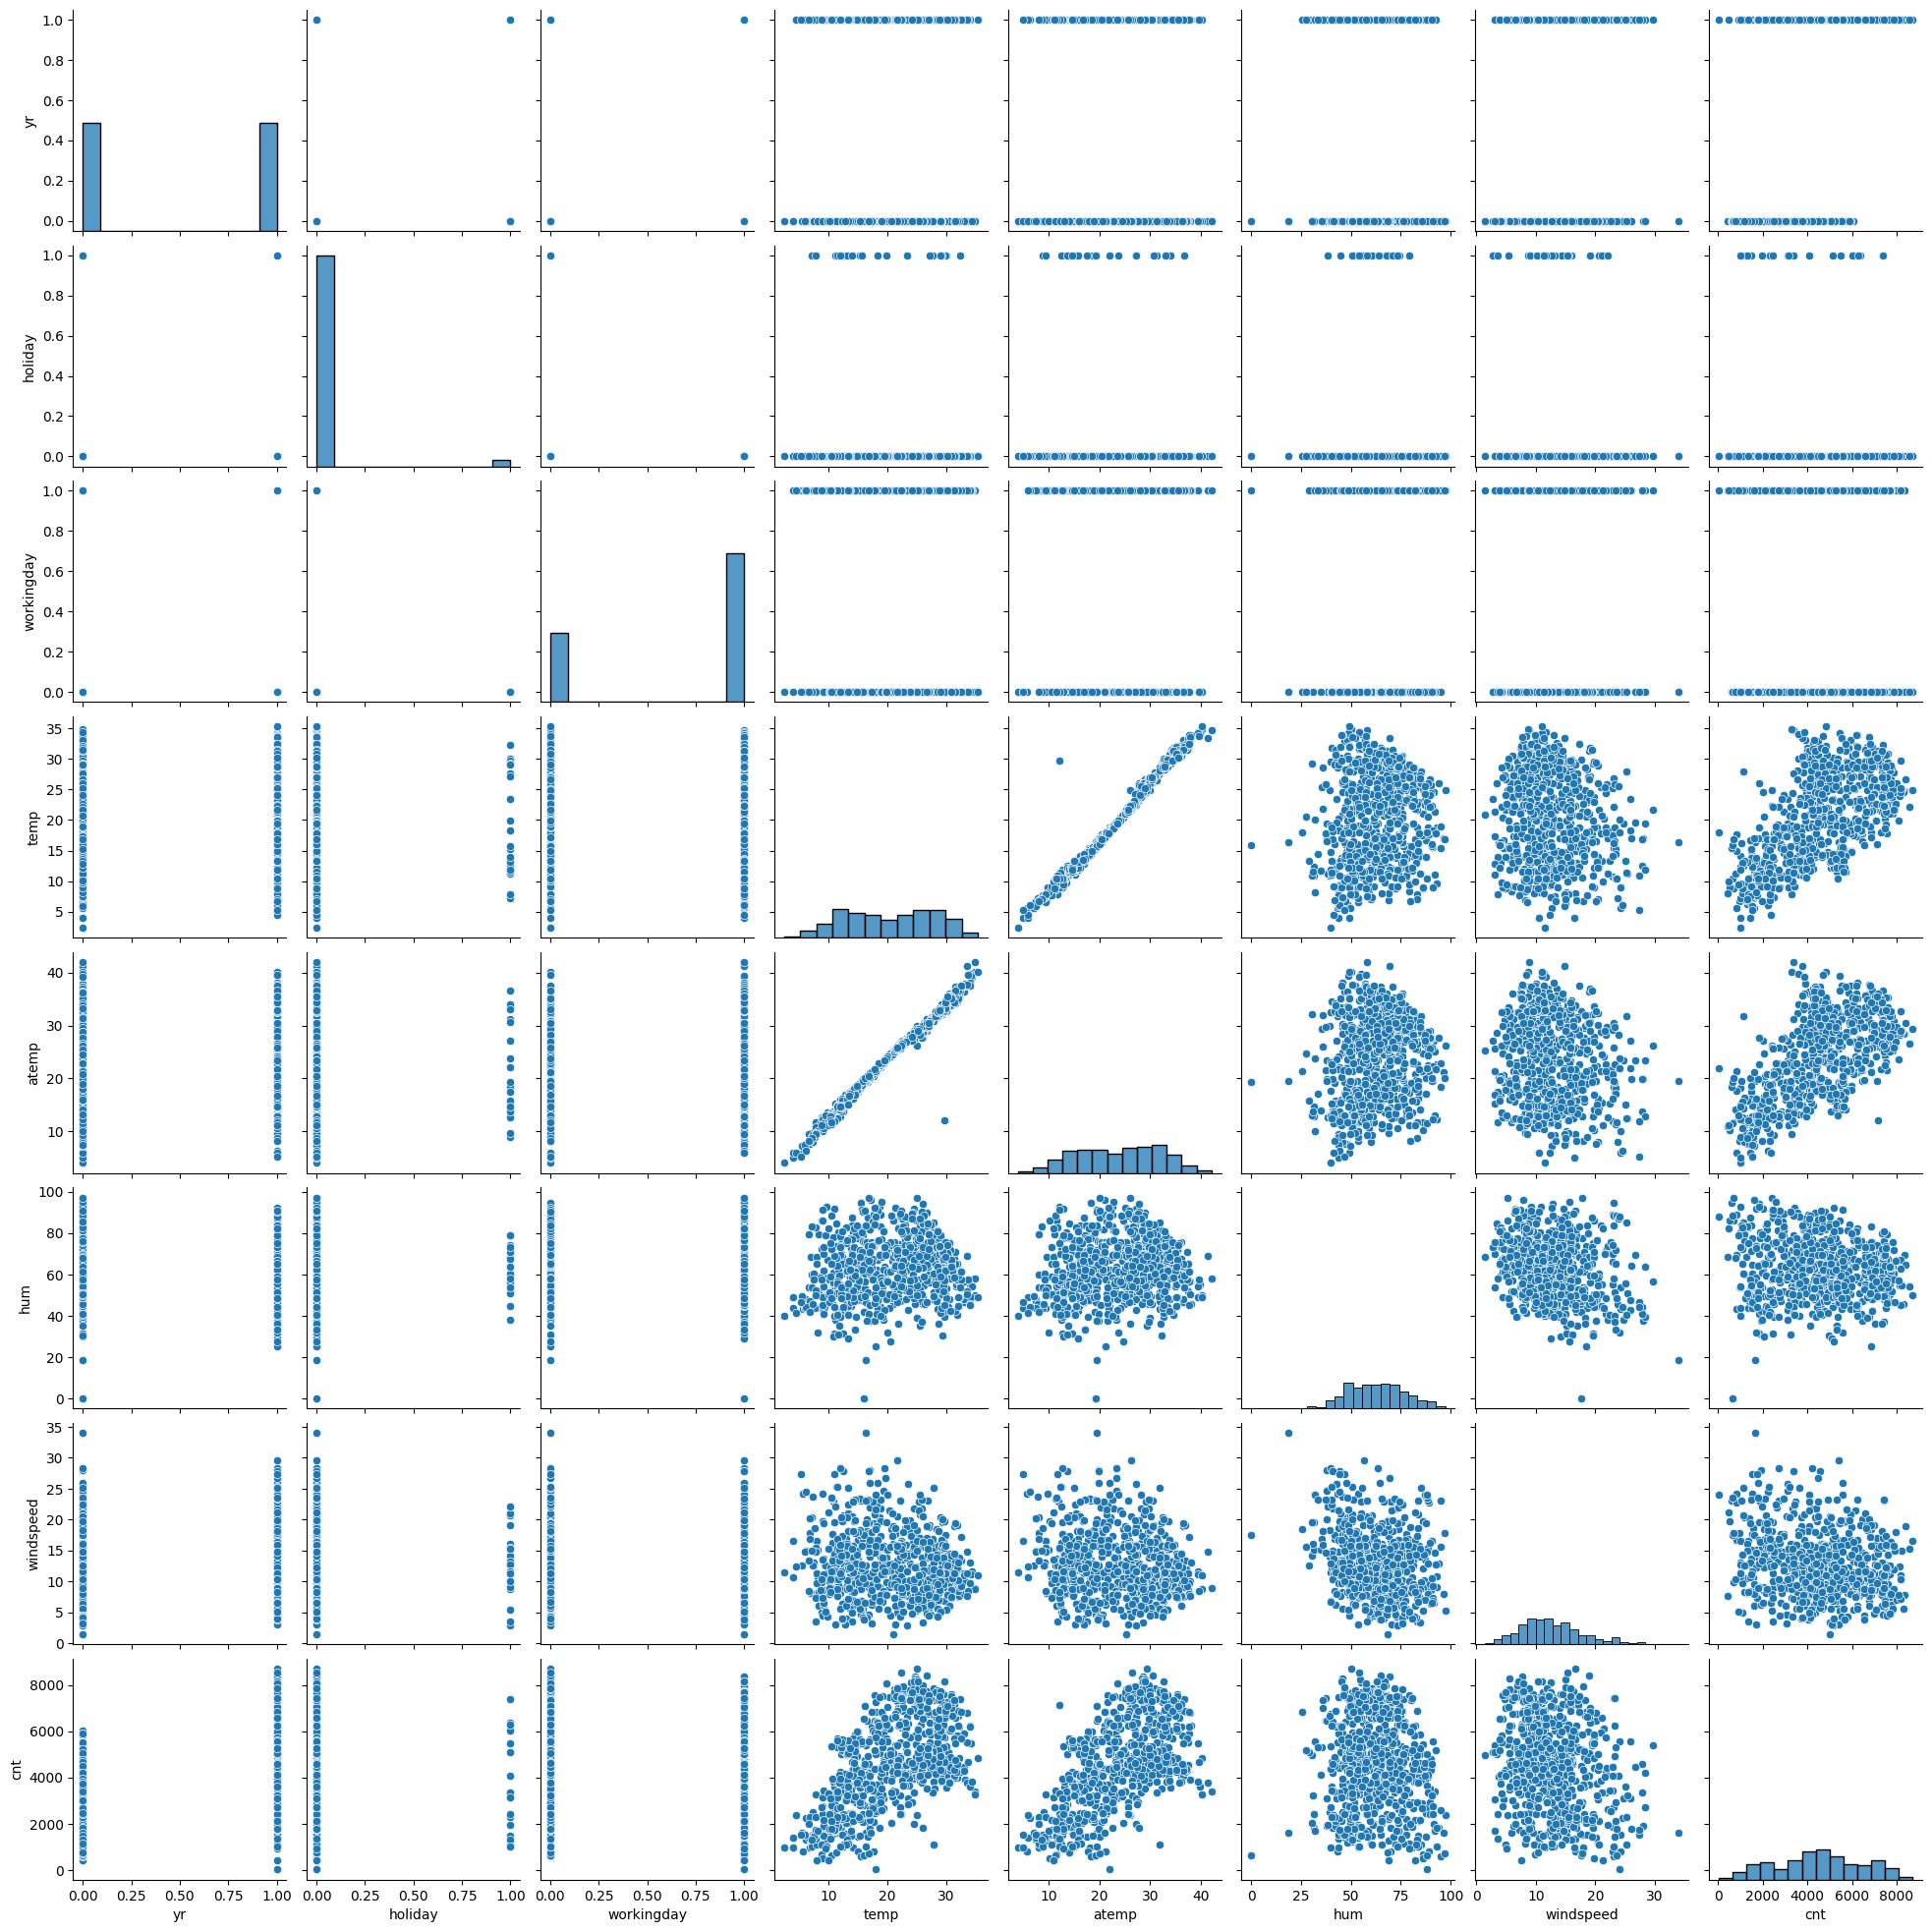

In [163]:
# Visualising the numerical variables:

sns.pairplot(df)
plt.show()

<Axes: xlabel='weekday', ylabel='cnt'>

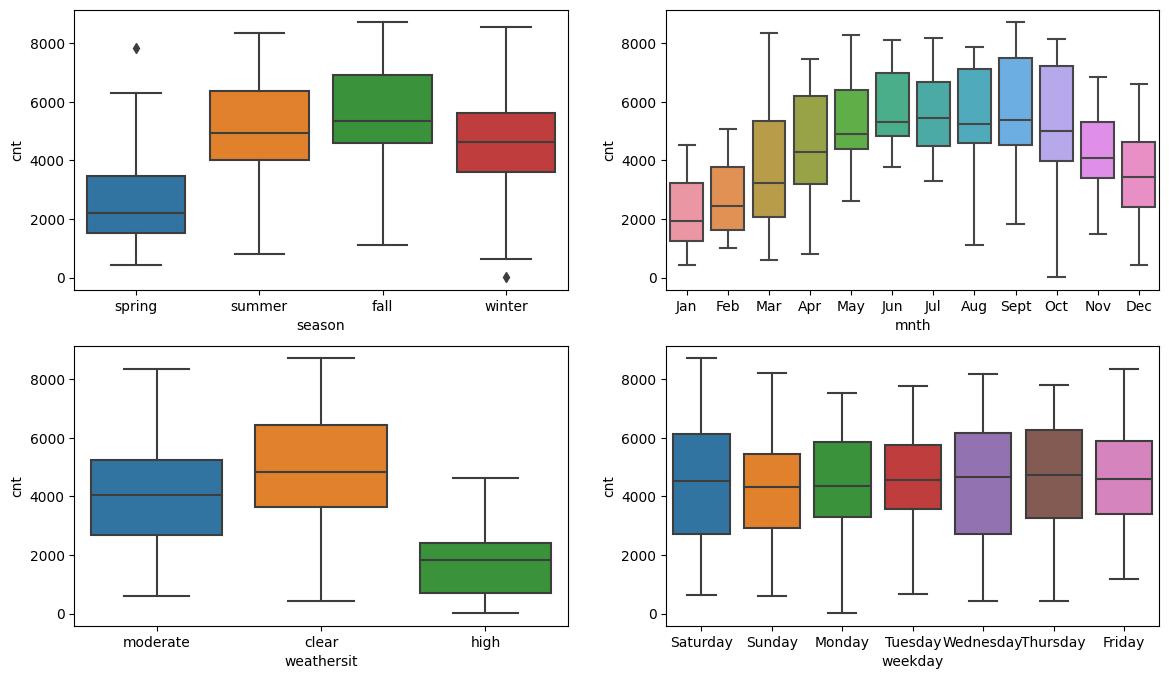

In [164]:
# Visualising categorical variables:

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.boxplot(x='season',  y='cnt', data=df)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth',  y='cnt', data=df)
plt.subplot(2,2,3)
sns.boxplot(x = 'weathersit',  y='cnt', data=df)
plt.subplot(2,2,4)
sns.boxplot(x='weekday', y='cnt', data=df)

In [165]:
df = pd.get_dummies(data=df, columns=['season'], drop_first=True)
df = pd.get_dummies(data=df, columns=["mnth"], drop_first=True)
df = pd.get_dummies(data=df, columns=["weekday"], drop_first=True)
df = pd.get_dummies(data=df, columns=["weathersit"])

In [166]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear,weathersit_high,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


In [167]:
df.shape

(730, 31)

train-test split:

In [168]:
from sklearn.model_selection import train_test_split

y = df.pop('cnt')
X = df

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(X_train.shape, X_test.shape)

(511, 30) (219, 30)


In [170]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_clear',
       'weathersit_high', 'weathersit_moderate'],
      dtype='object')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   season_spring        730 non-null    uint8  
 8   season_summer        730 non-null    uint8  
 9   season_winter        730 non-null    uint8  
 10  mnth_Aug             730 non-null    uint8  
 11  mnth_Dec             730 non-null    uint8  
 12  mnth_Feb             730 non-null    uint8  
 13  mnth_Jan             730 non-null    uint8  
 14  mnth_Jul             730 non-null    uint8  
 15  mnth_Jun             730 non-null    uin

In [172]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear,weathersit_high,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [173]:
from  sklearn.preprocessing import MinMaxScaler

# 1. Instantiate an object
scaler = MinMaxScaler()
# create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

# 2. Fit on data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [174]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear,weathersit_high,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [175]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear,weathersit_high,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.626223,0.029354,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.484280,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


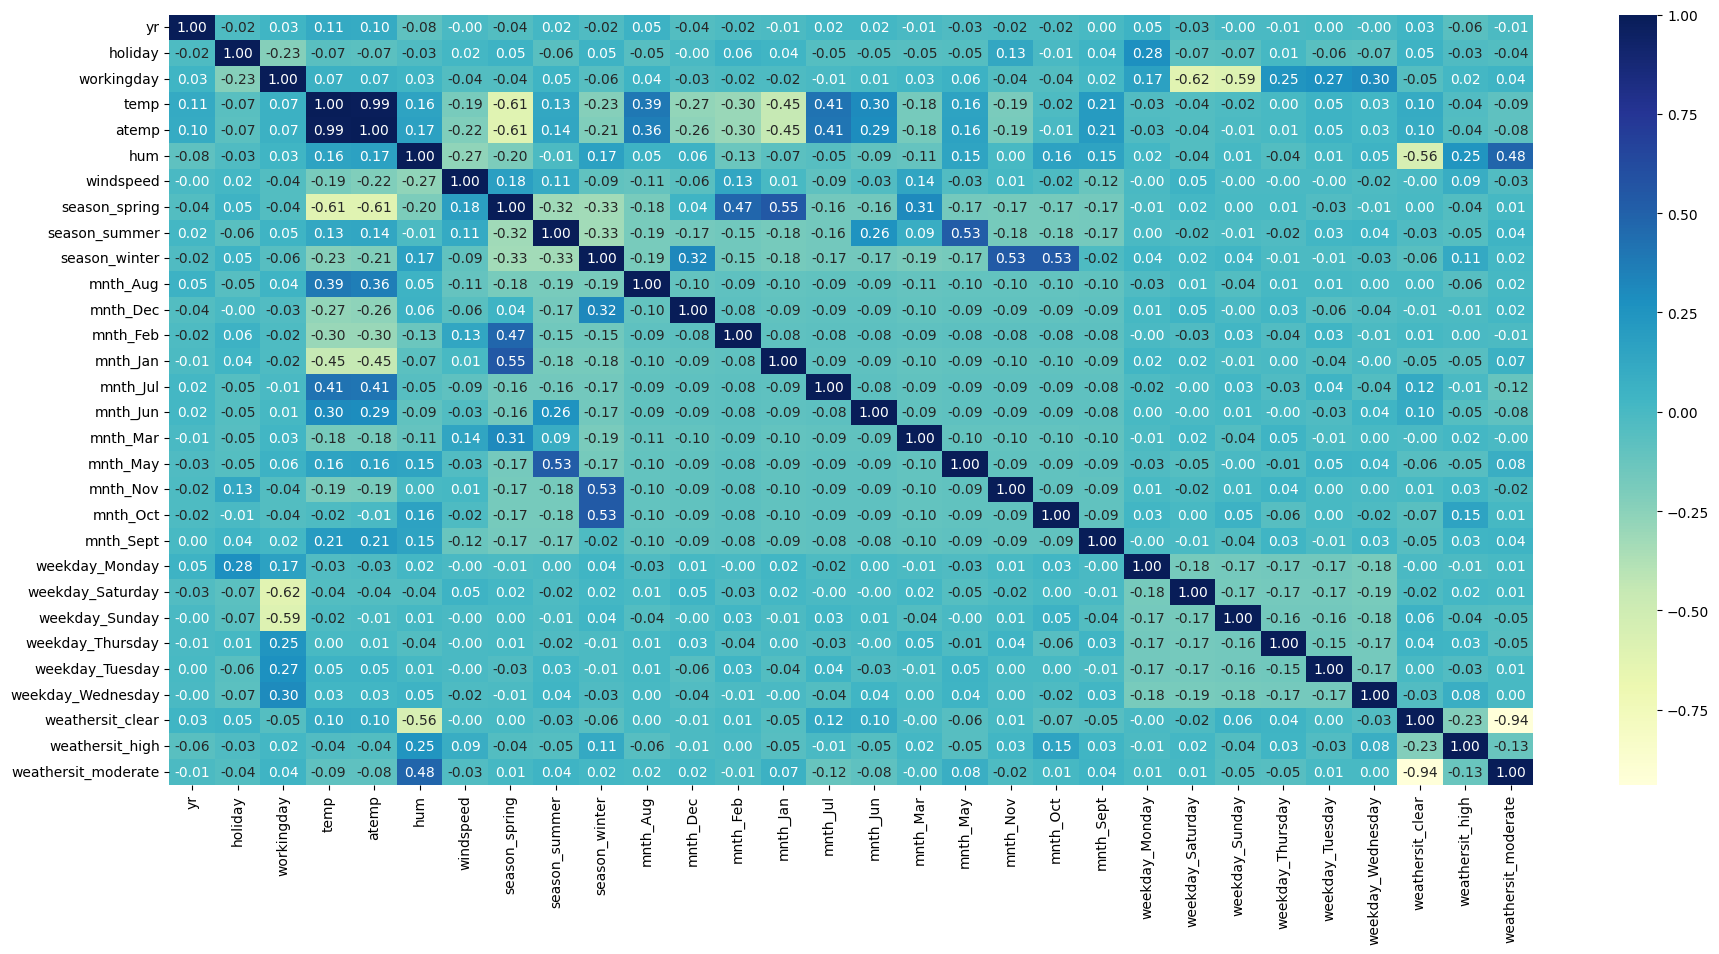

In [176]:
# Heatmap

plt.figure(figsize=(22, 10))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f' ,cmap='YlGnBu')
plt.show()

### RFE:

In [177]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [178]:
# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(estimator=lr,  n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [179]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 11),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sept', True, 1),
 ('weekday_Monday', False, 5),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 3),
 ('weekday_Thursday', False, 8),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 9),
 ('weathersit_clear', True, 1),
 ('weathersit_high', True, 1),
 ('weathersit_moderate', True, 1)]

In [180]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sept',
       'weekday_Saturday', 'weathersit_clear', 'weathersit_high',
       'weathersit_moderate'],
      dtype='object')

In [181]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [182]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [183]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [184]:
lrm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [185]:
#Let's see the summary of our linear model
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          3.03e-189
Time:                        18:03:24   Log-Likelihood:                -4109.6
No. Observations:                 511   AIC:                             8259.
Df Residuals:                     491   BIC:                             8344.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1205.6643    

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,weathersit_moderate,inf
19,weathersit_high,inf
18,weathersit_clear,inf
4,temp,59.16
5,atemp,53.87
8,season_spring,5.80
10,season_winter,3.98
9,season_summer,2.94
13,mnth_Jan,2.37
6,hum,1.94


---

In [187]:
X_train_rfe1 = X_train_rfe.drop(["mnth_Feb"], axis = 1)

X_train_lm1 = sm.add_constant(X_train_rfe1)

lrm1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [188]:
#Let's see the summary of our linear model
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          8.30e-190
Time:                        18:03:24   Log-Likelihood:                -4110.9
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     492   BIC:                             8340.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1134.9017    

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,weathersit_moderate,inf
18,weathersit_high,inf
17,weathersit_clear,inf
4,temp,58.92
5,atemp,53.87
8,season_spring,5.38
10,season_winter,3.97
9,season_summer,2.89
6,hum,1.94
3,workingday,1.88


---

In [190]:
X_train_rfe2 = X_train_rfe1.drop(["atemp"], axis = 1)

X_train_lm2 = sm.add_constant(X_train_rfe2)

lrm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

In [191]:
#Let's see the summary of our linear model
print(lrm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          6.47e-191
Time:                        18:03:24   Log-Likelihood:                -4110.9
No. Observations:                 511   AIC:                             8258.
Df Residuals:                     493   BIC:                             8334.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1132.7722    

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,weathersit_moderate,inf
17,weathersit_high,inf
16,weathersit_clear,inf
7,season_spring,5.27
4,temp,4.43
9,season_winter,3.83
8,season_summer,2.77
5,hum,1.94
3,workingday,1.88
15,weekday_Saturday,1.79


---

In [193]:
X_train_rfe3 = X_train_rfe2.drop(["weathersit_moderate"], axis = 1)

X_train_lm3 = sm.add_constant(X_train_rfe3)

lrm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

In [194]:
#Let's see the summary of our linear model
print(lrm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          6.47e-191
Time:                        18:03:24   Log-Likelihood:                -4110.9
No. Observations:                 511   AIC:                             8258.
Df Residuals:                     493   BIC:                             8334.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1913.0962    350.575  

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,106.48
7,season_spring,5.27
4,temp,4.43
9,season_winter,3.83
8,season_summer,2.77
5,hum,1.94
3,workingday,1.88
15,weekday_Saturday,1.79
13,mnth_Nov,1.76
11,mnth_Jan,1.68


---

In [196]:
X_train_rfe4 = X_train_rfe3.drop(["const"], axis = 1)

X_train_lm4 = sm.add_constant(X_train_rfe4)

lrm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model

In [197]:
#Let's see the summary of our linear model
print(lrm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          6.47e-191
Time:                        18:03:25   Log-Likelihood:                -4110.9
No. Observations:                 511   AIC:                             8258.
Df Residuals:                     493   BIC:                             8334.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1913.0962    350.575  

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.39
3,temp,22.42
2,workingday,5.38
6,season_spring,5.11
5,windspeed,4.77
8,season_winter,4.37
15,weathersit_clear,3.57
7,season_summer,3.05
0,yr,2.09
14,weekday_Saturday,1.99
